In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import FuncFormatter



<span style="font-size:24px; font-weight:bold; color:darkblue;">Import CSV File Data</span><br>

In [2]:
world_data = pd.read_csv("World_Population_Data.csv")
world_data.head()

,Unnamed: 0,#,Country (ordependency),Population(2025),YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop %,WorldShare
0,0,1,India,1463865525,0.89,12929734,492,2973190,-495753,1.94,28.8,37.1,17.78
1,1,2,China,1416096094,-0.23,-3225184,151,9388211,-268126,1.02,40.1,67.5,17.20
2,2,3,United States,347275807,0.54,1849236,38,9147420,1230663,1.62,38.5,82.8,4.22
3,3,4,Indonesia,285721236,0.79,2233305,158,1811570,-39509,2.10,30.4,59.6,3.47
4,4,5,Pakistan,255219554,1.57,3950390,331,770880,-1235336,3.50,20.6,34.4,3.10


<span style="font-size:24px; font-weight:bold; color:darkblue;">Top 30 Most Populated Country in the World</span><br>



In [3]:
top_30 = world_data.nlargest(30, "Population(2025)")

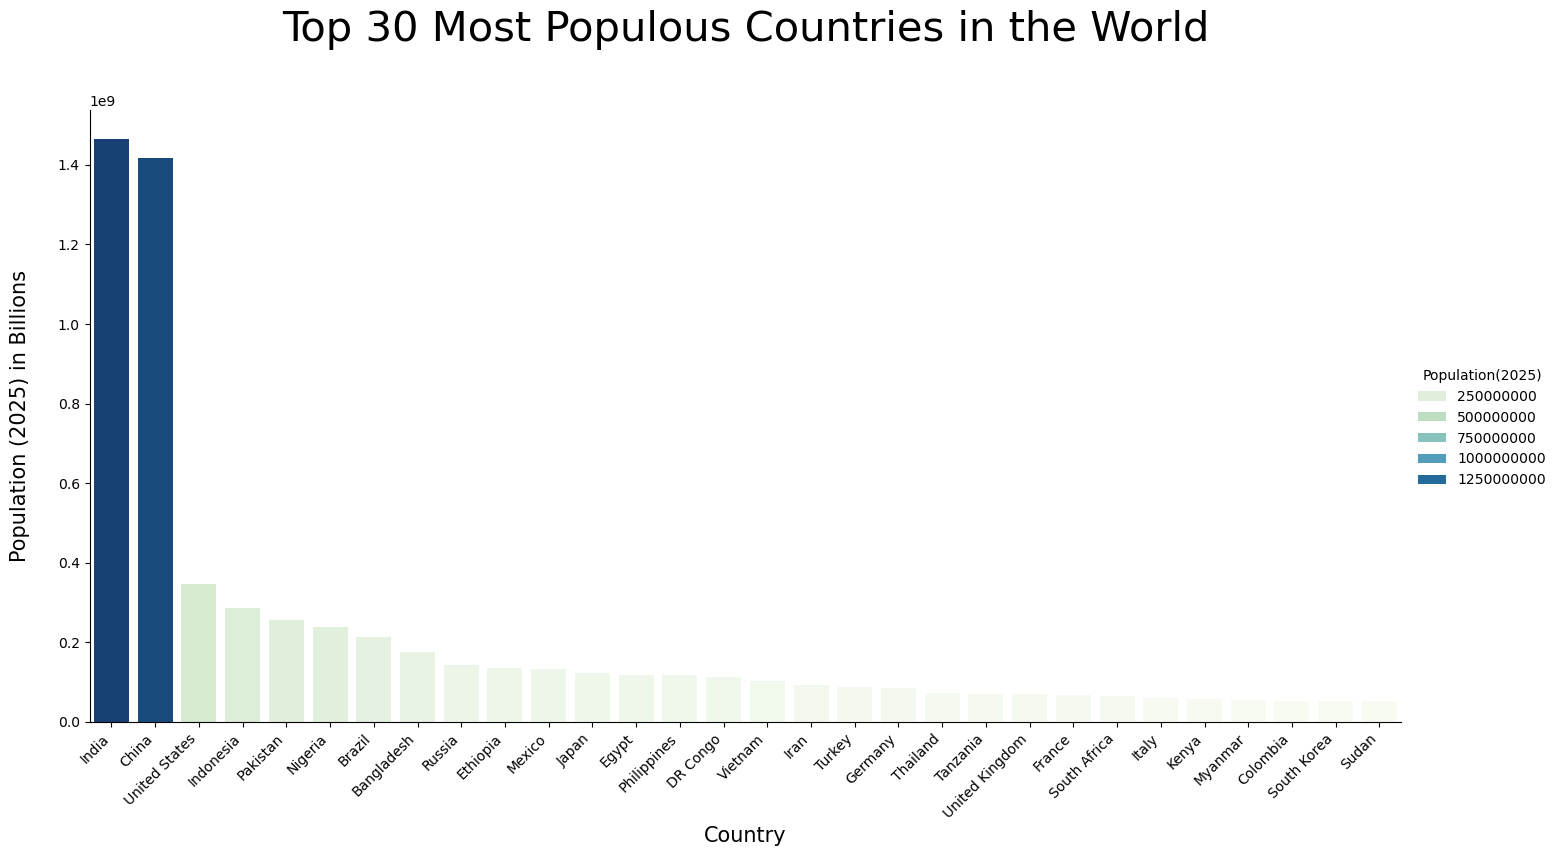

In [4]:

palette = sns.color_palette("GnBu", as_cmap=True)

sns.catplot(
    x="Country (ordependency)", 
    y="Population(2025)", 
    data=top_30,
    kind="bar",
    hue="Population(2025)",
    palette=palette,
    height=7, 
    aspect=2
)

plt.xticks(rotation=45, ha='right')
plt.title("Top 30 Most Populous Countries in the World", fontsize=30, pad=50)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Population (2025) in Billions", fontsize=15, labelpad=20)
plt.show()


<p>The Bar Graph Above shows India and China are the two countries with most number of population</p><br>

<span style="font-size:24px; font-weight: bold; color:darkblue;">Fertility Rate vs. Population</span><br>

In [5]:
fert_rate = top_30.sort_values("Fert.Rate")

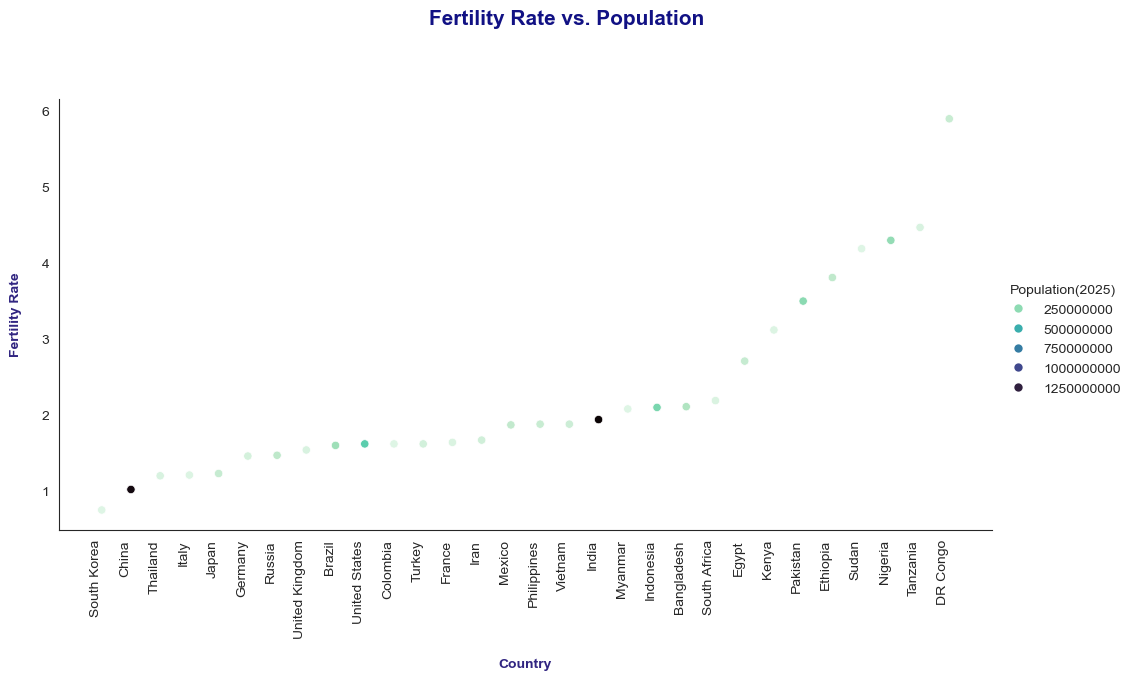

In [6]:
palette = sns.color_palette("mako_r", as_cmap=True)
sns.set_style("white")
g = sns.relplot(
    x="Country (ordependency)", 
    y="Fert.Rate", 
    data=fert_rate,
    kind="scatter",
    hue="Population(2025)",
    hue_norm=(top_30["Population(2025)"].min(), top_30["Population(2025)"].max()),
    palette=palette,
    height=5, 
    aspect=2
)

g.set_xticklabels(rotation=90, ha='right')
g.fig.suptitle("Fertility Rate vs. Population", y=1.15, color="#111184", fontsize=15, weight="bold")
g.set_axis_labels("Country", "Fertility Rate", labelpad=14, weight="bold", color="#312581")
plt.show()


<p><p>
  The scatterplot illustrates the relationship between fertility rate and population among countries. 
  The <strong>position</strong> of each plot point indicates the <strong>fertility rate</strong>. 
  The <strong>color shade</strong> of each point represents the <strong>population size (In Billions)</strong> — 
  the <em>darker</em> the color, the <strong>larger</strong> the population. 
  This visual effectively highlights countries with both high fertility rates and large populations.
</p>


<br><span style="font-size:24px; font-weight:bold; color:darkblue;">MIGRANTS (NET) VS POPULATION </p><br>

In [7]:
mig_pop = top_30.sort_values("Migrants(net)")

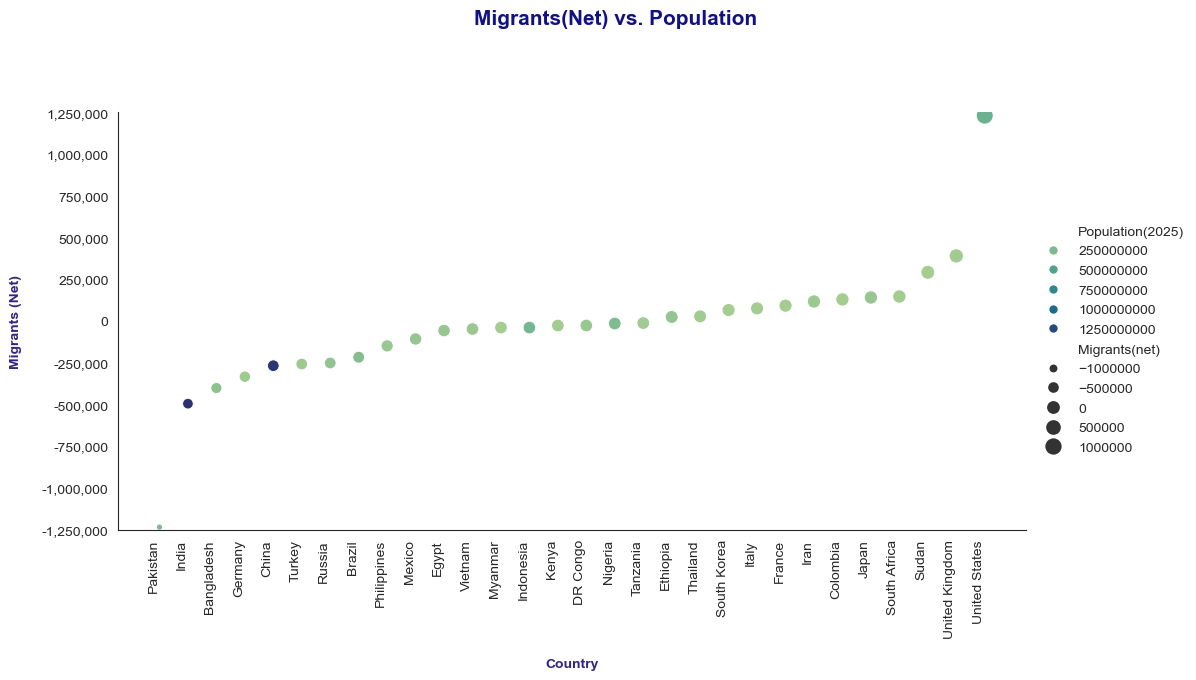

In [24]:

palette = sns.color_palette("crest", as_cmap=True)
sns.set_style("white")

g = sns.relplot(
    x="Country (ordependency)", 
    y="Migrants(net)", 
    data=mig_pop,
    kind="scatter",
    hue="Population(2025)",
    hue_norm=(top_30["Population(2025)"].min(), top_30["Population(2025)"].max()),
    palette=palette,
    size="Migrants(net)",
    size_norm=(mig_pop["Migrants(net)"].min(), mig_pop["Migrants(net)"].max()),
    sizes=(20,150),
    height=5, 
    aspect=2
)

g.set_xticklabels(rotation=90, ha='right')
g.fig.suptitle("Migrants(Net) vs. Population", y=1.15, color="#111184", fontsize=15, weight="bold")
g.set_axis_labels("Country", "Migrants (Net)", labelpad=14, weight="bold", color="#312581")

ax = g.ax
ax.set_yticks(np.arange(-1250000, 1250001, 250000))
ax.set_ylim(-1250000, 1250000)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.show()


<p>
The scatter plot above displays the relationship between the <strong>number of migrants (net)</strong> and <strong>population size</strong>. A <strong>higher position on the y-axis</strong> indicates a <em>greater net number of incoming migrants</em>. The <em>color shade</em> of each dot represents population size—<strong>darker shades</strong> indicate <em>larger populations</em>. The <strong>United States</strong> leads in <strong>net migration</strong> for the year 2025, with a population ranging between <em>250 million to 500 million</em>. In contrast, <strong>China</strong> and <strong>India</strong>, despite having the <em>highest populations</em>, show <em>relatively low net migration figures</em>.
</p>


<span style="font-size:24px; font-weight:bold; color:darkblue;">Top 10 Countries by Urban Population Percentage (2025)

In [27]:
world_data.info()
top_10 = world_data.nlargest(10, "UrbanPop %").sort_values("UrbanPop %", ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              233 non-null    int64  
 1   #                       233 non-null    int64  
 2   Country (ordependency)  233 non-null    object 
 3   Population(2025)        233 non-null    int64  
 4   YearlyChange            233 non-null    float64
 5   NetChange               233 non-null    int64  
 6   Density(P/Km²)          233 non-null    int64  
 7   Land Area(Km²)          233 non-null    int64  
 8   Migrants(net)           233 non-null    int64  
 9   Fert.Rate               233 non-null    float64
 10  MedianAge               233 non-null    float64
 11  UrbanPop %              210 non-null    float64
 12  WorldShare              233 non-null    float64
dtypes: float64(5), int64(7), object(1)
memory usage: 23.8+ KB


In [29]:
top_10 = top_10[["Country (ordependency)","UrbanPop %"]]

,Country (ordependency),UrbanPop %
210,Sint Maarten,99.8
82,Belgium,98.8
190,Guam,98.8
166,Macao,97.1
170,Western Sahara,97.0
136,Qatar,96.6
34,Argentina,96.0
182,French Guiana,94.5
222,Nauru,94.2
11,Japan,93.1


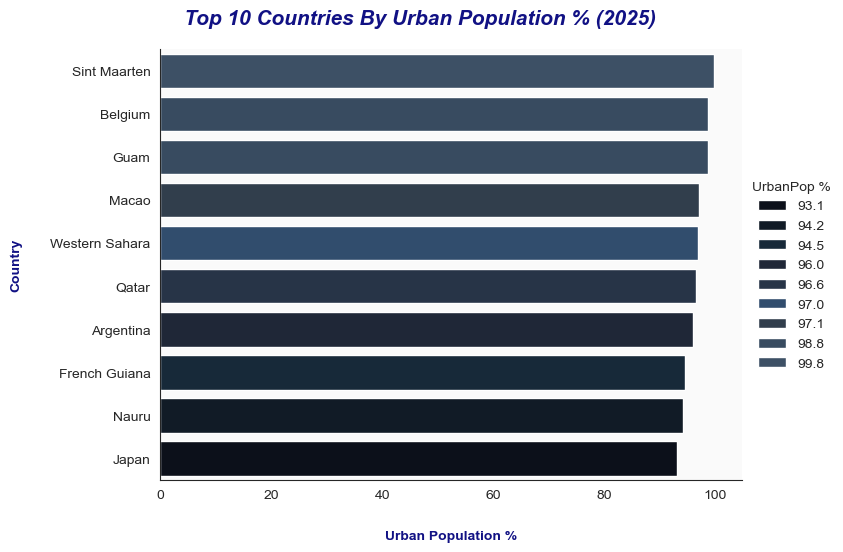

In [65]:
dark_blues = [
    "#0a0f1c",  # very dark navy
    "#0d1b2a",
    "#11293f",
    "#1b263b",
    "#22334c",
    "#274c77",
    "#2c3e50",
    "#324b66",
    "#37506b",
    "#1f3b4d"   # dark steel blue
]

x = sns.catplot(y="Country (ordependency)", 
           x = "UrbanPop %",
           kind="bar", 
           data =top_10,
           hue="UrbanPop %",
           palette=dark_blues[:9],
           height=5, 
           aspect=1.5)

ax = x.ax
x.fig.suptitle("Top 10 Countries By Urban Population % (2025)", y=1.05, fontsize=15, weight="bold", color="#111184", fontstyle="oblique")
x.set_axis_labels("Urban Population %", "Country", labelpad=20, weight="bold", color="#111184")
x.ax.set_facecolor("#fafafa")



<p>
The bar chart above illustrates the <strong>Top 10 Most Highly Urbanized Countries</strong> out of <strong>233 countries</strong>, based on their <strong>Urban Population Percentage</strong>. <em>Sint Maarten</em> ranks as the <strong>number one</strong> most urbanized country, while <em>Japan</em> holds the <strong>tenth</strong> position. This highlights the countries with the largest proportion of their population living in <strong>urban areas</strong>.
</p>
